In [1]:
from matplotlib import pyplot as plot #用来绘制图形
import numpy as np  #用来处理数据
from mpl_toolkits.mplot3d import Axes3D  #用来给出三维坐标系。

### average the final score

In [7]:
seg1, seg2 = 0.2650, 0.5820
norm1, norm2, norm3, norm_mean, norm_median = 29.40, 72.30, 87.30, 17.70, 16.30
dep1, dep2, dep3, dep_abs, dep_rel = 57.80, 85.80, 96.00, 0.62, 0.24

# seg1, seg2 = 20.36, 49.44
# norm1, norm2, norm3, norm_mean, norm_median = 28.37, 70.20, 85.58, 18.17, 16.62
# dep1, dep2, dep3, dep_abs, dep_rel = 47.92, 78.46, 92.81, 0.77, 0.28

# our results
# mIoU, Pixel_acc = 0.2605, 0.5761
# angle_mean, angle_median, angle1, angle2, angle3 = 16.8531, 15.0566, 35.2228, 74.379, 87.4045
# abs_err, rel_err, sigma1, sigma2, sigma3 = 0.5347, 0.2076, 66.4785, 90.2409, 97.4907

mIoU, Pixel_acc = 0.2471, 0.5651
angle_mean, angle_median, angle1, angle2, angle3 = 17.2588, 15.2826, 34.4473, 74.5579, 86.9762
abs_err, rel_err, sigma1, sigma2, sigma3 = 0.5898, 0.2328, 61.0953, 87.7431, 96.4779

test_acc = 0.5 * (mIoU/seg1 + Pixel_acc/seg2) + \
            (angle1/norm1 + angle2/norm2 + angle3/norm3 - angle_mean/norm_mean - angle_median/norm_median) + \
            (sigma1/dep1 + sigma2/dep2 + sigma3/dep3 - abs_err/dep_abs - rel_err/dep_rel)

test_acc
print(test_acc/3.0)

1.1338651443387777


In [ ]:
seg1, seg2 = 0.2712, 0.5913
norm1, norm2, norm3, norm_mean, norm_median = 29.40, 72.30, 87.30, 17.70, 16.30
dep1, dep2, dep3, dep_abs, dep_rel = 57.91, 86.61, 96.37, 0.61, 0.23

seg1, seg2 = 20.36, 49.44
norm1, norm2, norm3, norm_mean, norm_median = 28.37, 70.20, 85.58, 18.17, 16.62
dep1, dep2, dep3, dep_abs, dep_rel = 47.92, 78.46, 92.81, 0.77, 0.28



In [2]:

# X = np.arange(-10, 10, 0.25)
# Y = np.arange(-10, 10, 0.25)
Y = np.asarray([0.6, 0.7, 0.8, 0.9, 0.95, 0.98, 0.99])   #  backbone
X = np.asarray([0.9, 0.93, 0.95, 0.97, 0.99])

#限定图形的样式是网格线的样式：
X, Y = np.meshgrid(X, Y)
# print(X)
Z = np.asarray([
    [1.2393, 1.2461, 1.2314, 1.2549, 1.1984],
    [1.2516, 1.2237, 1.229, 1.2376, 1.2008],
    [1.2382, 1.2184, 1.2528, 1.2547, 1.2023],
    [1.227, 1.2834, 1.2492, 1.2507, 1.1959],
    [1.214, 1.229, 1.2154, 1.2414, 1.1745],
    [1.2019, 1.2129, 1.2063, 1.2189, 1.1664],
    [1.2001, 1.1941, 1.2013, 1.1994, 1.137]
])

# Z = np.reshape(Z, (5, 7))


In [9]:
max_item = max(max(row) for row in Z)
max_item

# backbone: 90%
# head: 93%

1.2834

/tmp/ipykernel_232239/3760918292.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure)


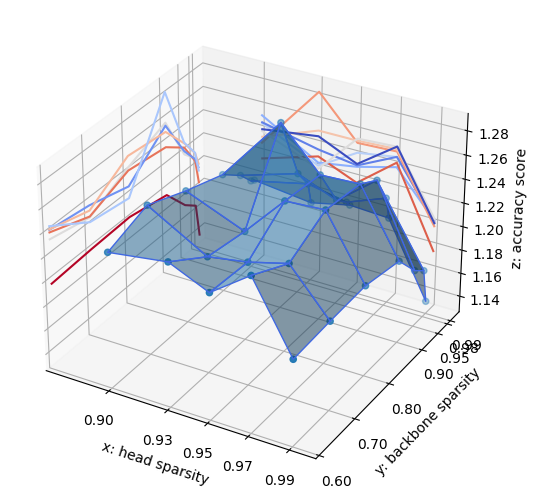

In [3]:
figure = plot.figure()
#画出三维坐标系：
ax = Axes3D(figure)

# add annotation for the axis
ax.set_ylabel('y: backbone sparsity')
ax.set_xlabel('x: head sparsity')
ax.set_zlabel('z: accuracy score')

# edit the range of X, Y, Z
ax.set_xticks([0.9, 0.93, 0.95, 0.97, 0.99])
ax.set_yticks([0.6, 0.7, 0.8, 0.9, 0.95, 0.98, 0.99])

ax.set_xlim([0.87, 1.0])
ax.set_ylim([0.6, 1.01])

#绘制曲面，采用彩虹色着色：
ax.scatter3D(X, Y, Z, cmap='Blues')
ax.plot_surface(X,Y,Z,rstride = 1, cstride = 1,edgecolor='royalblue', alpha=0.5,)
# alpha means transparency

# ax.contour(X, Y, Z, zdir='z', offset=0.7, cmap='coolwarm')
ax.contour(X, Y, Z, zdir='x', offset=0.87, cmap='coolwarm')
ax.contour(X, Y, Z, zdir='y', offset=1.01, cmap='coolwarm')

#图形可视化：
plot.show()

### Reshape X, Y

In [4]:

# X = np.arange(-10, 10, 0.25)
# Y = np.arange(-10, 10, 0.25)
X = np.asarray([0.6, 0.7, 0.8, 0.9, 0.95, 0.98, 0.99])   #  backbone
# X = np.asarray([0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99])
Y = np.asarray([0.9, 0.93, 0.95, 0.97, 0.99])

#限定图形的样式是网格线的样式：
X, Y = np.meshgrid(X, Y)
# print(X)
Z = np.asarray([
    [1.2393, 1.2461, 1.2314, 1.2549, 1.1984],
    [1.2516, 1.2237, 1.229, 1.2376, 1.2008],
    [1.2382, 1.2184, 1.2528, 1.2547, 1.2023],
    [1.227, 1.2834, 1.2492, 1.2507, 1.1959],
    [1.214, 1.229, 1.2154, 1.2414, 1.1745],
    [1.2019, 1.2129, 1.2063, 1.2189, 1.1664],
    [1.2001, 1.1941, 1.2013, 1.1994, 1.137]
])

Z = np.transpose(Z)
print(Z)

[[1.2393 1.2516 1.2382 1.227  1.214  1.2019 1.2001]
 [1.2461 1.2237 1.2184 1.2834 1.229  1.2129 1.1941]
 [1.2314 1.229  1.2528 1.2492 1.2154 1.2063 1.2013]
 [1.2549 1.2376 1.2547 1.2507 1.2414 1.2189 1.1994]
 [1.1984 1.2008 1.2023 1.1959 1.1745 1.1664 1.137 ]]


/tmp/ipykernel_232239/1499668984.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure)


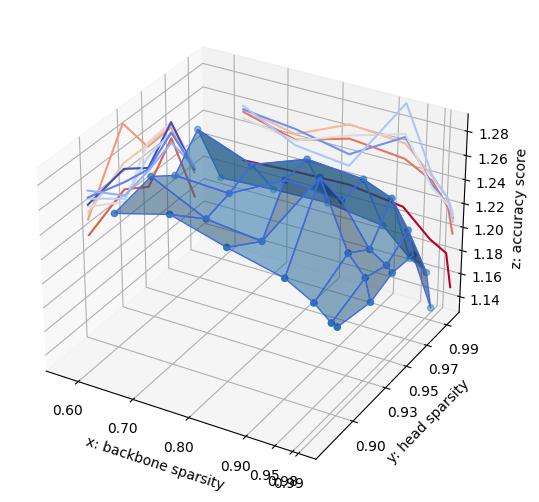

In [5]:
figure = plot.figure()
#画出三维坐标系：
ax = Axes3D(figure)

# add annotation for the axis
ax.set_xlabel('x: backbone sparsity')
ax.set_ylabel('y: head sparsity')
ax.set_zlabel('z: accuracy score')

# edit the range of X, Y, Z
ax.set_yticks([0.9, 0.93, 0.95, 0.97, 0.99])
ax.set_xticks([0.6, 0.7, 0.8, 0.9, 0.95, 0.98, 0.99])

ax.set_ylim([0.87, 1.0])
ax.set_xlim([0.55, 1.01])

#绘制曲面，采用彩虹色着色：
ax.scatter3D(X, Y, Z, cmap='Blues')
ax.plot_surface(X,Y,Z,rstride = 1, cstride = 1,edgecolor='royalblue', alpha=0.5,)
# alpha means transparency

# ax.contour(X, Y, Z, zdir='z', offset=0.7, cmap='coolwarm')
ax.contour(X, Y, Z, zdir='x', offset=0.55, cmap='coolwarm')
ax.contour(X, Y, Z, zdir='y', offset=1.01, cmap='coolwarm')

#图形可视化：
plot.show()